<a href="https://colab.research.google.com/github/Victor1e/BlackJack/blob/main/BlackJack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Am simulat jocuri de BlackJack cu o tehnica standard. Jucatorul si Dealer-ul trag carti din pachet pana ce au o suma mai mare sau egala cu 17 apoi se opresc. Am analizat care este procentajul de castig, egal sau pierdere pentru jucator.

Blackjack este un joc de noroc popular, iar analiza probabilităților în cadrul acestuia poate oferi o perspectivă utilă asupra deciziilor strategice ale jucătorului. Această problemă combină teoria probabilităților și statistica pentru a estima șansele de câștig.

In [ ]:
import random

def blackjack_simulation(num_games):
    card_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
    deck = card_values * 4

    def draw_card(deck):
        return deck.pop(random.randint(0, len(deck) - 1))

    def calculate_hand(hand):
        total = sum(hand)
        while total > 21 and 11 in hand:
            hand[hand.index(11)] = 1
            total = sum(hand)
        return total

    def play_player(deck):
        hand = [draw_card(deck), draw_card(deck)]
        while calculate_hand(hand) < 17:
            hand.append(draw_card(deck))
        return calculate_hand(hand)

    def play_dealer(deck):
        hand = [draw_card(deck), draw_card(deck)]
        while calculate_hand(hand) < 17:
            hand.append(draw_card(deck))
        return calculate_hand(hand)

    player_wins = 0
    dealer_wins = 0
    ties = 0

    for _ in range(num_games):
        random.shuffle(deck)
        current_deck = deck.copy()


        player_total = play_player(current_deck)
        dealer_total = play_dealer(current_deck)


        if player_total > 21:
            dealer_wins += 1
        elif dealer_total > 21 or player_total > dealer_total:
            player_wins += 1
        elif player_total == dealer_total:
            ties += 1
        else:
            dealer_wins += 1

    win_probability = player_wins / num_games
    tie_probability = ties / num_games
    lose_probability = dealer_wins / num_games

    return win_probability, tie_probability, lose_probability


num_simulations = 1000000
win_prob, tie_prob, lose_prob = blackjack_simulation(num_simulations)


print(f"Probabilitatea de câștig pentru jucător: {win_prob}")
print(f"Probabilitatea de egalitate: {tie_prob}")
print(f"Probabilitatea de pierdere: {lose_prob}")


Probabilitatea de câștig pentru jucător: 0.408708
Probabilitatea de egalitate: 0.102546
Probabilitatea de pierdere: 0.488746


Metoda Monte Carlo se bazează pe legea numerelor mari, care afirmă că media aritmetică a rezultatelor obținute din simulări converge către valoarea așteptată adevărată pe măsură ce numărul de simulări crește. În cazul nostru, probabilitățile estimate (câștig, egalitate, pierdere) converg spre valorile reale.

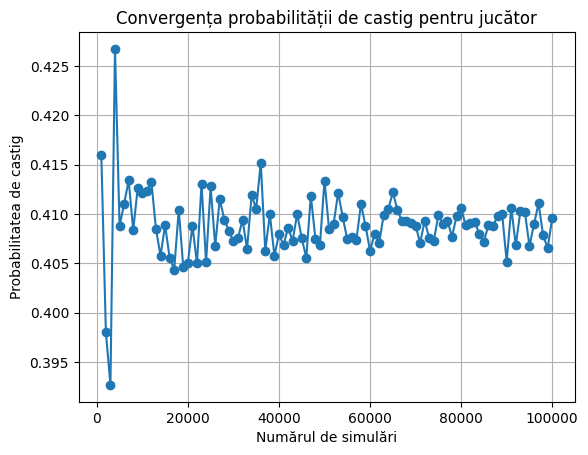

In [ ]:
import matplotlib.pyplot as plt

def visualize_convergence(num_simulations):
    win_rates = []
    for i in range(1000, num_simulations + 1, 1000):
        win_prob, _, _ = blackjack_simulation(i)
        win_rates.append(win_prob)

    plt.plot(range(1000, num_simulations + 1, 1000), win_rates, marker='o')
    plt.title("Convergența probabilității de castig pentru jucător")
    plt.xlabel("Numărul de simulări")
    plt.ylabel("Probabilitatea de castig")
    plt.grid()
    plt.show()

visualize_convergence(100000)


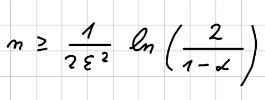

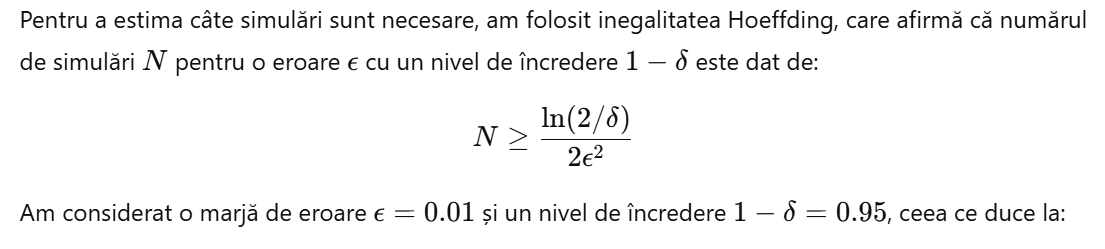

In [4]:
import math

def calculate_min_simulations(epsilon, confidence):
    delta = 1 - confidence
    return math.ceil(math.log(2/delta) / (2 * epsilon**2))

epsilon = 0.01
confidence = 0.95
min_simulations = calculate_min_simulations(epsilon, confidence)

print(f"Numărul minim de simulări necesare: {min_simulations}")



Numărul minim de simulări necesare: 18445
